Baseado no Tutorial: https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
train_images.shape


(60000, 28, 28)

In [ ]:
len(train_labels)


60000

In [ ]:
test_images.shape


(10000, 28, 28)

In [ ]:
len(test_labels)


10000

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

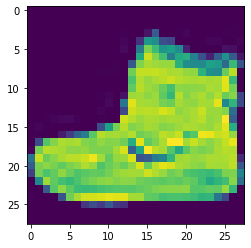

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


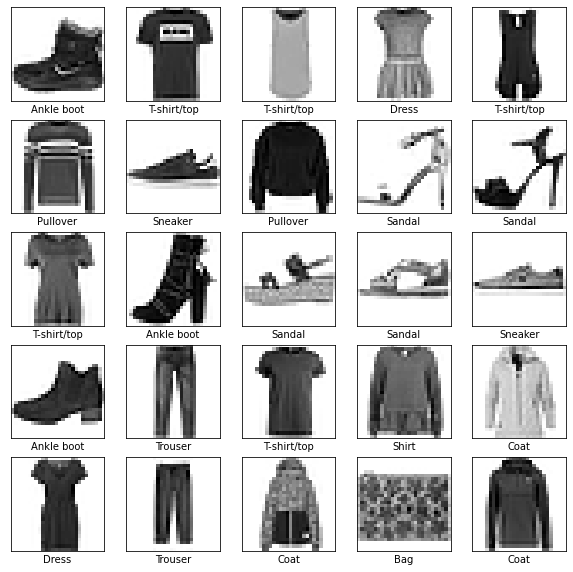

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
hist = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6284 - accuracy: 0.7884 - val_loss: 0.4983 - val_accuracy: 0.8284
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4732 - accuracy: 0.8397 - val_loss: 0.4657 - val_accuracy: 0.8404
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4452 - accuracy: 0.8476 - val_loss: 0.4427 - val_accuracy: 0.8478
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4287 - accuracy: 0.8516 - val_loss: 0.4529 - val_accuracy: 0.8424
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4188 - accuracy: 0.8559 - val_loss: 0.4378 - val_accuracy: 0.8491
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4120 - accuracy: 0.8574 - val_loss: 0.4295 - val_accuracy: 0.8526
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4058 - accuracy: 0.8609 - val_loss: 0.4281 - val_accuracy:

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([7.68417408e-07, 9.72870495e-09, 1.18855505e-05, 9.94657785e-06,
       9.01267595e-06, 1.54366374e-01, 4.44706347e-05, 5.45924678e-02,
       1.16859442e-02, 7.79279172e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])


9

In [ ]:
test_labels[0]


9

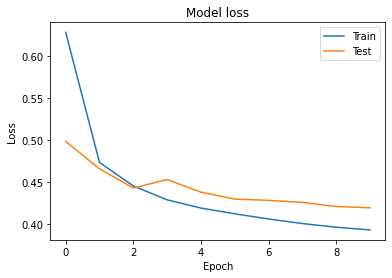

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

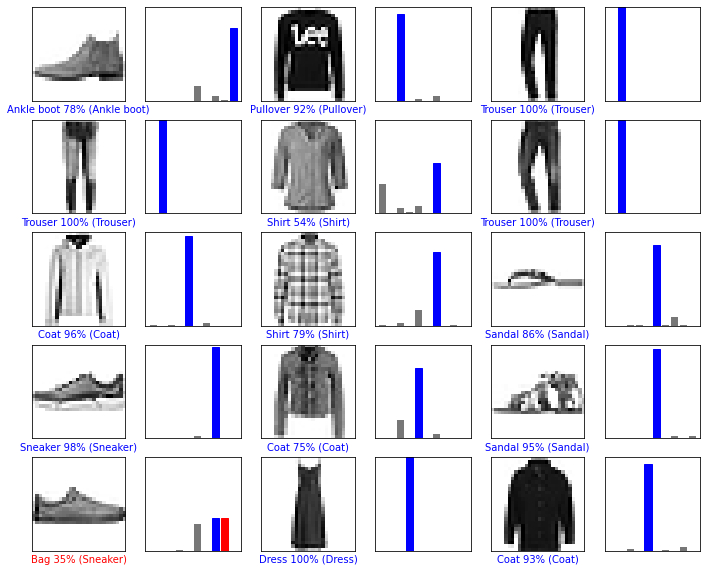

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()